# Dependencies import and getting data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/census-income.csv',skipinitialspace=True)
data['Salary'] = data['Unnamed: 14']
data.drop('Unnamed: 14',axis = 1,inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  Salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
data.shape

(32561, 15)

# Data PreProcessing
* Replace all the missing values with NA.
* Remove all the rows that contain NA values.



In [ ]:
data.replace('?',np.nan,inplace = True)
data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
Salary               0
dtype: int64

In [ ]:
data.dropna(inplace = True)
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Salary            0
dtype: int64

# Data Manipulation
* a) Extract the “education” column and store it in “census_ed” .

In [ ]:
census_ed = data['education']
census_ed

0         Bachelors
1         Bachelors
2           HS-grad
3              11th
4         Bachelors
            ...    
32556    Assoc-acdm
32557       HS-grad
32558       HS-grad
32559       HS-grad
32560       HS-grad
Name: education, Length: 30162, dtype: object

* b) Extract all the columns from “age” to “relationship” and store it in “census_seq”.




In [ ]:
census_seq = data.loc[:,'age':'relationship']
census_seq

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife
...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child


* c) Extract the column number “5”, “8”, “11” and store it in “census_col”.


In [ ]:
census_col = data.iloc[:,[5,8,11]]
census_col

,marital-status,race,capital-loss
0,Never-married,White,0
1,Married-civ-spouse,White,0
2,Divorced,White,0
3,Married-civ-spouse,Black,0
4,Married-civ-spouse,Black,0
...,...,...,...
32556,Married-civ-spouse,White,0
32557,Married-civ-spouse,White,0
32558,Widowed,White,0
32559,Never-married,White,0


* d) Extract all the male employees who work in state-gov and store it in “male_gov”.


In [ ]:
male_gov = data.loc[(data['workclass'] == 'State-gov') & (data['sex'] == 'Male')]
male_gov

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Unnamed: 14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
34,22,State-gov,311512,Some-college,10,Married-civ-spouse,Other-service,Husband,Black,Male,0,0,15,United-States,<=50K
48,41,State-gov,101603,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
123,29,State-gov,267989,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32163,36,State-gov,135874,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
32241,45,State-gov,231013,Bachelors,13,Divorced,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32321,54,State-gov,138852,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
32324,42,State-gov,138162,Some-college,10,Divorced,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K


* e) Extract all the 39 year olds who either have a bachelor's degree or who are
native of the United States and store the result in “census_us”.


In [ ]:
census_us = data.loc[(data.age == 39)].loc[(data.education == 'Bachelors') | (data['native-country'] == 'United-States')]
census_us

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Unnamed: 14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
28,39,Private,367260,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,80,United-States,<=50K
129,39,Private,365739,Some-college,10,Divorced,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
166,39,Federal-gov,235485,Assoc-acdm,12,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,42,United-States,<=50K
320,39,Self-emp-not-inc,174308,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32146,39,Private,117381,Some-college,10,Divorced,Transport-moving,Not-in-family,White,Male,0,0,65,United-States,<=50K
32260,39,Federal-gov,232036,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
32428,39,Federal-gov,110622,Bachelors,13,Married-civ-spouse,Adm-clerical,Wife,Asian-Pac-Islander,Female,0,0,40,Philippines,<=50K
32468,39,Self-emp-not-inc,193689,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,65,United-States,<=50K


* f) Extract 200 random rows from the “census” data frame and store it in “census_200”.


In [ ]:
census_200 = data.sample(200)
census_200

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Unnamed: 14
14875,25,Federal-gov,339956,Some-college,10,Married-civ-spouse,Protective-serv,Husband,Black,Male,0,0,40,United-States,<=50K
23900,79,Self-emp-not-inc,103684,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States,<=50K
13793,20,Private,386643,Some-college,10,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,<=50K
26894,61,Private,162432,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
5149,28,Private,199600,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19606,46,Private,35406,7th-8th,4,Separated,Other-service,Not-in-family,White,Female,0,0,32,United-States,<=50K
9423,24,Private,285432,HS-grad,9,Never-married,Exec-managerial,Own-child,White,Male,0,0,40,United-States,<=50K
23922,24,Private,206671,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
5538,34,State-gov,34104,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,7688,0,38,United-States,>50K


* g) Get the count of different levels of the “workclass” column.


In [ ]:
data.workclass.value_counts()

Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: workclass, dtype: int64

* h) Calculate the mean of the “capital.gain” column grouped according to “workclass”.


In [ ]:
data.groupby('workclass')['capital-gain'].agg('mean')

workclass
Federal-gov          832.321315
Local-gov            829.230285
Private              879.858207
Self-emp-inc        4810.746741
Self-emp-not-inc    1913.134454
State-gov            684.306489
Without-pay          487.857143
Name: capital-gain, dtype: float64

* i) Create a separate dataframe with the details of males and females from the census
data that has income more than 50,000.


In [ ]:
df = data.loc[data['Salary'] == '>50K']
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32538,38,Private,139180,Bachelors,13,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K
32545,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


* j) Calculate the percentage of people from the United States who are private employees
and earn less than 50,000 annually.


In [ ]:
(data.loc[(data['native-country'] == 'United-States') & (data.workclass == 'Private') & (data.Salary == '<=50K')].shape[0] / data.shape[0]) * 100

51.70081559578277

* k) Calculate the percentage of married people in the census data.


In [ ]:
(data.loc[(data['marital-status'] ==  'Married-civ-spouse') |
         (data['marital-status'] ==  'Married-spouse-absent') |
         (data['marital-status'] ==  'Married-AF-spouse') ].shape[0] / data.shape[0]) * 100


47.92785624295471

* l) Calculate the percentage of high school graduates earning more than 50,000
annually.

In [ ]:
(data.loc[(data['education'] == 'HS-grad') & (data['Salary'] == '>50K')].shape[0] / data.shape[0]) * 100

5.361050328227571

# Linear Regression:
a) Build a simple linear regression model as follows:


* Divide the dataset into training and test sets in 70:30 ratio.
* Build a linear model on the test set where the dependent variable is
“hours.per.week” and the independent variable is “education.num”.
* Predict the values on the train set and find the error in prediction.
* Find the root-mean-square error (RMSE).








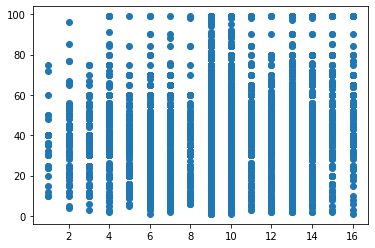

In [ ]:
plt.scatter(data['education-num'],data['hours-per-week'])

In [ ]:
data.corr().iloc[2:3,-1]

education-num    0.152522
Name: hours-per-week, dtype: float64

In [ ]:
X = data['education-num']
Y = data['hours-per-week']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.30,random_state = 31)
print(X_train.shape,'\n',X_test.shape,'\n',y_train.shape,'\n',y_test.shape)

(21113,) 
 (9049,) 
 (21113,) 
 (9049,)


In [ ]:
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
linear_predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
error = mean_squared_error(linear_predictions,y_test)
error

139.8671727934992

In [ ]:
rmse = np.sqrt(error)
rmse

11.826545260282025

In [ ]:
r2_score(linear_predictions,y_test)

-44.44792309511434

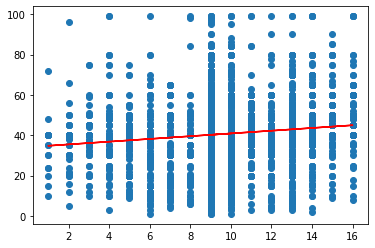

In [ ]:
plt.scatter(X_test,y_test)
plt.plot(X_test,linear_predictions,color='red')
plt.show()

# Logistic Regression:
a) Build a simple logistic regression model as follows:
* Divide the dataset into training and test sets in 65:35 ratio.
* Build a logistic regression model where the dependent variable is
“X”(yearly income) and the independent variable is “occupation”.
* Predict the values on the test set.
* Build a confusion matrix and find the accuracy.

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [ ]:
log_X = label_encoder.fit_transform(data['occupation'])
log_y = label_encoder.fit_transform(data['Salary'])

In [ ]:
log_X_train, log_X_test, log_y_train, log_y_test = train_test_split(log_X,log_y,test_size = 0.35 , random_state = 42)

In [ ]:
log_X_train = np.array(log_X_train).reshape(-1,1)
log_X_test = np.array(log_X_test).reshape(-1,1)
log_y_train = np.array(log_y_train)
log_y_test = np.array(log_y_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(log_X_train,log_y_train)

LogisticRegression()

In [ ]:
logistic_predictions = log_model.predict(log_X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
confusion_matrix(logistic_predictions,log_y_test)

array([[7882, 2675],
       [   0,    0]])

In [ ]:
accuracy_score(logistic_predictions,log_y_test)

0.7466136212939282

# Muliple Logistic Regression

b)Build a multiple logistic regression model as follows:
* Divide the dataset into training and test sets in 80:20 ratio.
* Build a logistic regression model where the dependent variable is
“X”(yearly income) and independent variables are “age”, “workclass”, and
“education”.
* Predict the values on the test set.
* Build a confusion matrix and find the accuracy

In [ ]:
mul_log_X = pd.DataFrame()
for i in ['age','workclass','education']:
  mul_log_X[i] = label_encoder.fit_transform(data[i])
mul_log_y = log_y

In [ ]:
mul_log_X_train, mul_log_X_test, mul_log_y_train, mul_log_y_test = train_test_split(mul_log_X,mul_log_y,test_size = 0.20 , random_state = 42)

In [ ]:
mul_log_X_train = np.array(mul_log_X_train)
mul_log_X_test = np.array(mul_log_X_test)
mul_log_y_train = np.array(mul_log_y_train)
mul_log_y_test = np.array(mul_log_y_test)

In [ ]:
mul_log_model = LogisticRegression()

In [ ]:
mul_log_model.fit(mul_log_X_train,mul_log_y_train)
mul_log_predictions = mul_log_model.predict(mul_log_X_test)

In [ ]:
confusion_matrix(mul_log_predictions,mul_log_y_test)

array([[4354, 1484],
       [ 149,   46]])

In [ ]:
accuracy_score(mul_log_predictions,mul_log_y_test)

0.7293220619923753

# Decision Tree:
a) Build a decision tree model as follows:
* Divide the dataset into training and test sets in 70:30 ratio.
* Build a decision tree model where the dependent variable is “X”(Yearly Income)
and the rest of the variables as independent variables.
* Predict the values on the test set.
* Build a confusion matrix and calculate the accuracy.

In [ ]:
DEC_X = pd.DataFrame()
for i in data.columns[:14]:
  DEC_X[i] = label_encoder.fit_transform(data[i])
DEC_Y = log_y

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dec_model = DecisionTreeClassifier()

In [ ]:
dec_X_train, dec_X_test, dec_y_train, dec_y_test = train_test_split(DEC_X,DEC_Y,test_size = 0.30,random_state=42)

In [ ]:
dec_model.fit(dec_X_train,dec_y_train)

DecisionTreeClassifier()

In [ ]:
dec_predictions = dec_model.predict(dec_X_test)

In [ ]:
confusion_matrix(dec_predictions,dec_y_test)

array([[5868,  875],
       [ 899, 1407]])

In [ ]:
accuracy_score(dec_predictions,dec_y_test)

0.803956238258371

# Random Forest:
a) Build a random forest model as follows:
* Divide the dataset into training and test sets in 80:20 ratio.
* Build a random forest model where the dependent variable is “X”(Yearly Income)
and the rest of the variables as independent variables and number of trees as 300.
* Predict values on the test set
* Build a confusion matrix and calculate the accuracy

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(n_estimators = 300)
forest_model.fit(dec_X_train,dec_y_train)
forest_prediction = forest_model.predict(dec_X_test)

In [ ]:
confusion_matrix(forest_prediction,dec_y_test)

array([[6294,  835],
       [ 473, 1447]])

In [ ]:
accuracy_score(forest_prediction,dec_y_test)

0.85545364128633

# Time Series

 For this problem, use the population dataset, and perform the following:

*  EDA on the time series to find trends and seasonality.
*  Forecast the population on the given dataset for the next 6 months. 

In [ ]:
#!pip install pmdarima
from pmdarima import auto_arima
from pmdarima.arima.utils import ndiffs

In [4]:
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
tsdata = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/popdata.csv')
tsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   816 non-null    float64
 1   date    816 non-null    object 
dtypes: float64(1), object(1)
memory usage: 12.9+ KB


In [5]:
print('No. of nulls in the dataset',tsdata.isnull().sum().sum())

No. of nulls in the dataset 0


In [6]:
tsdata.sample(5)

,value,date
801,298980.950,2018-10-01
264,183922.000,1974-01-01
384,206375.000,1984-01-01
701,280538.502,2010-06-01
23,132443.000,1953-12-01


In [7]:
tsdata['date'] = tsdata.date.astype('datetime64')

In [8]:
tsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   value   816 non-null    float64       
 1   date    816 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.9 KB


In [9]:
tsdata.set_index('date',inplace=True)

In [10]:
print("No. of years present in data : ",(tsdata.shape[0] / 12))
print("No. of months present in data : ",tsdata.shape[0])

No. of years present in data :  68.0
No. of months present in data :  816


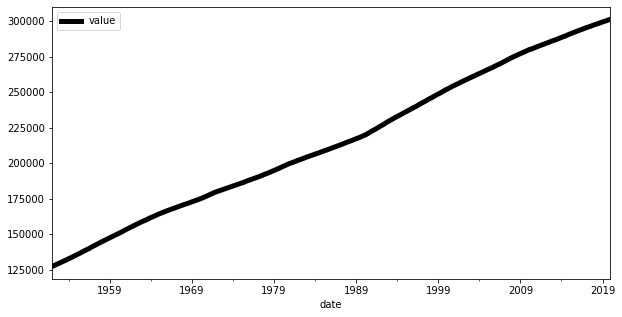

In [11]:
tsdata.plot(figsize=(10,5),color = 'black',linewidth = 5)
plt.show()

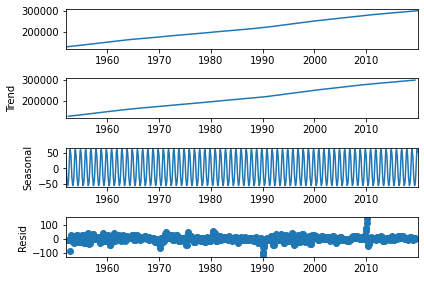

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
dec_r=seasonal_decompose(tsdata,model='addidtive')
dec_r.plot()
plt.show()

In [13]:
from statsmodels.tsa.stattools import adfuller
def resadful(dataset):
  pval = adfuller(dataset['value'])[1]
  print("Pvalue according to adfuller test is : ",pval)
  if pval > 0.05:
    print("Accepting Null Hypothesis: Time Series is not stationary")
  else:
    print("Rejecting Null Hypothesis: Time Series is stationary")


In [14]:
resadful(tsdata)

Pvalue according to adfuller test is :  0.855529777911024
Accepting Null Hypothesis: Time Series is not stationary


In [ ]:
# Adf Test
print(ndiffs(tsdata, test='adf')) 

2


By doing the ndiffs test from the pmdarima model we can know what degree of differencing can make the series stationary

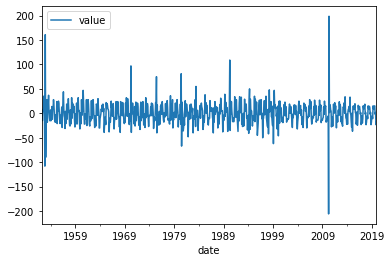

In [15]:
tsdata_defrenced = tsdata.diff().diff().dropna()
tsdata_defrenced.plot()
plt.show()

In [16]:
resadful(tsdata_defrenced)

Pvalue according to adfuller test is :  2.1100121875843522e-10
Rejecting Null Hypothesis: Time Series is stationary


The adfuller test on the two timed diffrenced data shows that the data is now stationary

Seasonal Decompose of defrenced data


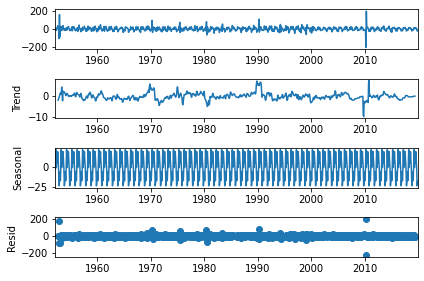

In [17]:
seasonal_decompose(tsdata_defrenced).plot()
print('Seasonal Decompose of defrenced data')
plt.show()

In [21]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

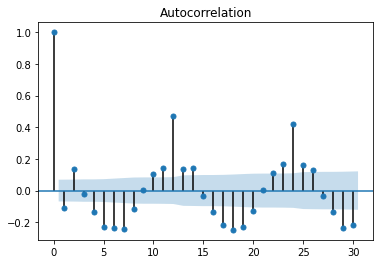

In [22]:
plot_acf(tsdata_defrenced)
plt.show()

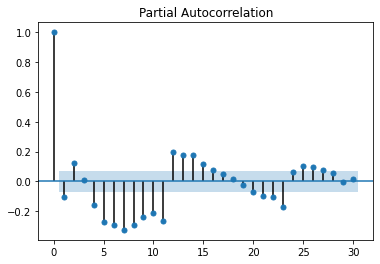

In [23]:
plot_pacf(tsdata_defrenced)
plt.show()

from the above plots we can measure p to be 6 and q to be 3

In [24]:
def arima_test(x,p,d,q):
  train=tsdata.iloc[:x]['value']
  test=tsdata.iloc[x:]['value']
  model=ARIMA(train,order=(p,d,q))
  model_fit = model.fit()
  pred=model_fit.forecast(816-x)
  return test,pred

Accuracy of the model with different amount of datapoints

In [25]:
p,q,d = 6,3,2
for x in [700,750,800,810]:
  print('STARTING NEW TEST')
  test,pred = arima_test(x,p,d,q)
  print("RMSE of the model with ",x,'datapoints is',np.sqrt(mean_squared_error(test,pred)))
  print("MAE of the model with ",x,'datapoints is',mean_absolute_error(test,pred))
  print("MAPE of the model with ",x,'datapoints is',mean_absolute_percentage_error(test,pred))

STARTING NEW TEST
RMSE of the model with  700 datapoints is 3786.9621483220335
MAE of the model with  700 datapoints is 3302.7058339531864
MAPE of the model with  700 datapoints is 0.01121794030603478
STARTING NEW TEST
RMSE of the model with  750 datapoints is 568.7311631737546
MAE of the model with  750 datapoints is 415.2737550343127
MAPE of the model with  750 datapoints is 0.0013904554052768096
STARTING NEW TEST
RMSE of the model with  800 datapoints is 63.957614734078554
MAE of the model with  800 datapoints is 58.3425252600282
MAPE of the model with  800 datapoints is 0.0001942573186245658
STARTING NEW TEST
RMSE of the model with  810 datapoints is 9.387503426837844
MAE of the model with  810 datapoints is 5.739636906597298
MAPE of the model with  810 datapoints is 1.9057175176133857e-05


The best score is for the highest number of datapoints 


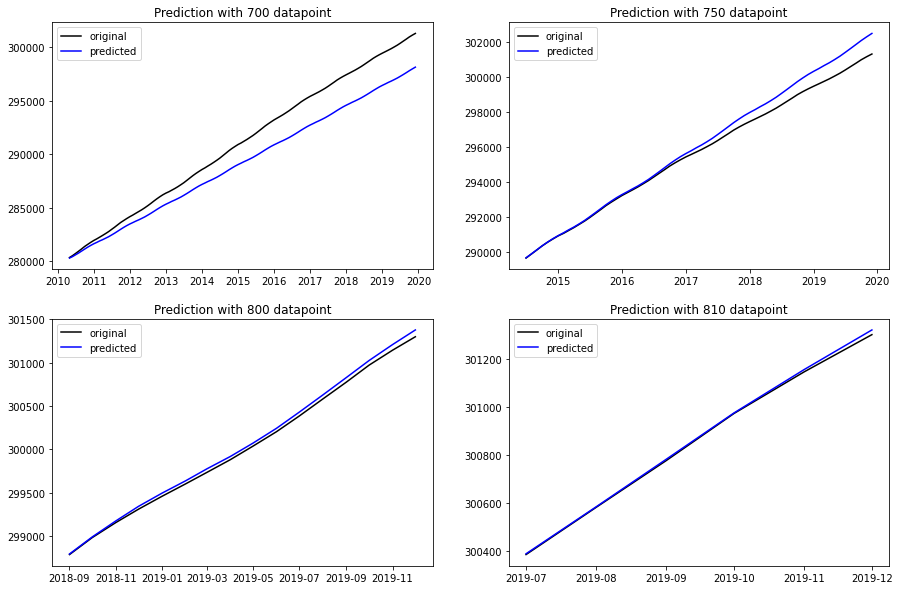

In [37]:
plt.figure(figsize = (15,10))
for x,i in enumerate([700,750,800,810]):
  test,pred = arima_test(i,p,d,q)
  plt.subplot(2,2,x+1)
  plt.title('Prediction with '+str(i)+' datapoint')
  plt.plot(test,label='original',c='black')
  plt.plot(pred,label='predicted',c='blue')
  plt.legend()

We can see in the graph that the best accuracy is being recieved when we take most of the datapoints for model training.
* So we will train the final model on all the datapoints available since there is no more need of validation.

In [33]:
model=ARIMA(tsdata[:815],order=(6,2,3))
model_fit = model.fit()
pred_6_mon=model_fit.forecast(7)
pred_6_mon

2019-12-01    301308.727880
2020-01-01    301458.722728
2020-02-01    301599.465235
2020-03-01    301736.455298
2020-04-01    301879.633811
2020-05-01    302033.971831
2020-06-01    302203.031763
Freq: MS, Name: predicted_mean, dtype: float64

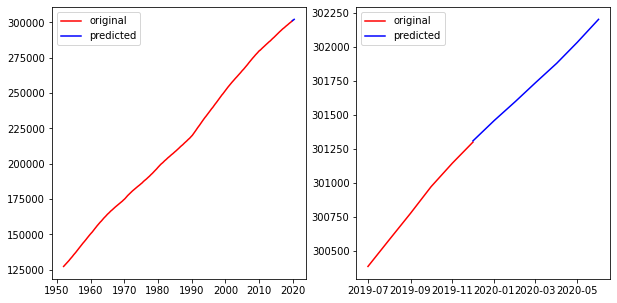

In [40]:
plt.figure(figsize = (10,5))
plt.subplot(121)
plt.plot(tsdata,label='original',c='red')
plt.plot(pred_6_mon,label='predicted',c='blue')
plt.legend()

plt.subplot(122)
plt.plot(tsdata[810:],label='original',c='red')
plt.plot(pred_6_mon,label='predicted',c='blue')
plt.legend()
plt.show()



We can see the predictions in the right hand graph which is the zoomed graph of left hand one.

#This can be done using the Auto Arima model which helps us in calculating the p,q,d value without the need of any pvalue test and differencing.

In [ ]:
auto_arima(tsdata['value'].dropna(),trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=7351.451, Time=1.37 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=7389.026, Time=0.12 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=7381.987, Time=0.15 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=7383.820, Time=0.32 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=7311.381, Time=0.41 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=7365.358, Time=0.22 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=7377.876, Time=0.27 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=7366.475, Time=0.43 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=7351.871, Time=0.34 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=7373.282, Time=0.34 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=6850.784, Time=1.79 sec
 ARIMA(3,2,3)(0,0,0)[0]             : AIC=7346.350, Time=1.87 sec
 ARIMA(2,2,4)(0,0,0)[0]             : AIC=6848.490, Time=1.98 sec
 ARIMA(1,2,4)(0,0,0)[0]             : AIC=7247.280, Time=0.77 sec
 ARIMA(3,2,4)(0,0,0)[0]          

ARIMA(order=(3, 2, 5), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

AUTO ARIMA model recommended p,q,d are 3,5,2 respectively.


In [30]:
p,q,d = 3,5,2
for x in [700,750,800,810]:
  print('STARTING NEW TEST')
  test,pred = arima_test(x,p,d,q)
  print("RMSE of the model with ",x,'datapoints is',np.sqrt(mean_squared_error(test,pred)))
  print("MAE of the model with ",x,'datapoints is',mean_absolute_error(test,pred))
  print("MAPE of the model with ",x,'datapoints is',mean_absolute_percentage_error(test,pred))

STARTING NEW TEST
RMSE of the model with  700 datapoints is 2073.3925986175796
MAE of the model with  700 datapoints is 1825.6185665103203
MAPE of the model with  700 datapoints is 0.006204197418796306
STARTING NEW TEST
RMSE of the model with  750 datapoints is 534.1127358861189
MAE of the model with  750 datapoints is 385.0349375552923
MAPE of the model with  750 datapoints is 0.0012889230871635873
STARTING NEW TEST
RMSE of the model with  800 datapoints is 43.361428824229876
MAE of the model with  800 datapoints is 39.38614754689115
MAPE of the model with  800 datapoints is 0.00013113549744295878
STARTING NEW TEST
RMSE of the model with  810 datapoints is 9.355869049927664
MAE of the model with  810 datapoints is 7.064546729787253
MAPE of the model with  810 datapoints is 2.346473181634101e-05


Accuracy of the model with different amount of datapoints, The best score is for the highest number of datapoints 


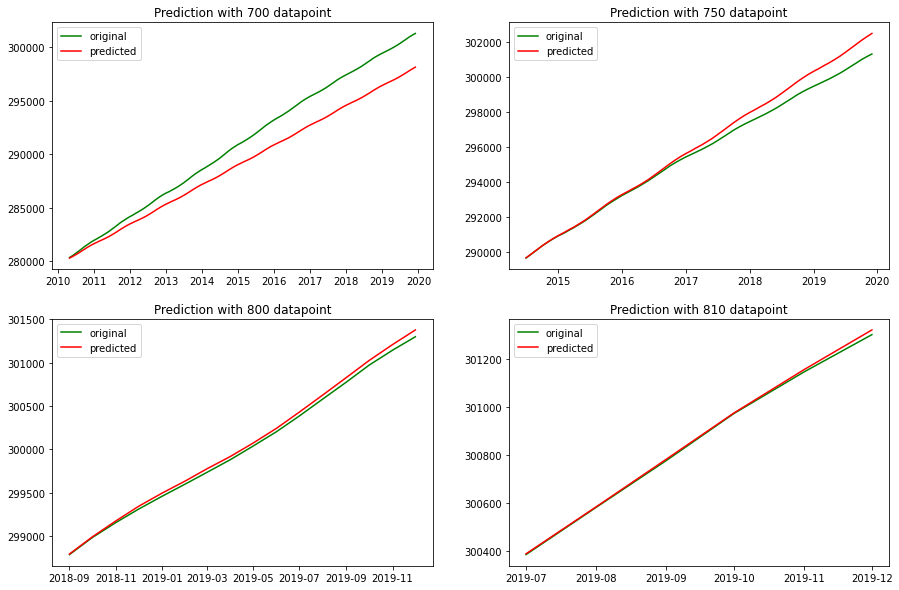

In [31]:
plt.figure(figsize = (15,10))
for x,i in enumerate([700,750,800,810]):
  test,pred = arima_test(i,p,d,q)
  plt.subplot(2,2,x+1)
  plt.title('Prediction with '+str(i)+' datapoint')
  plt.plot(test,label='original',c='g')
  plt.plot(pred,label='predicted',c='r')
  plt.legend()

We can see in the graph that the best accuracy is being recieved when we take most of the datapoints for model training.
* So we will train the final model on all the datapoints available since there is no more need of validation.

In [35]:
model_auto=ARIMA(tsdata[:815],order=(3,2,5))
model_fit_auto = model_auto.fit()
pred_6_mon_auto=model_fit_auto.forecast(7)
pred_6_mon_auto

2019-12-01    301307.971629
2020-01-01    301454.930221
2020-02-01    301592.664498
2020-03-01    301726.531588
2020-04-01    301866.831748
2020-05-01    302018.355392
2020-06-01    302186.532258
Freq: MS, Name: predicted_mean, dtype: float64

We can see above the predicited value for the upcoming 6 months

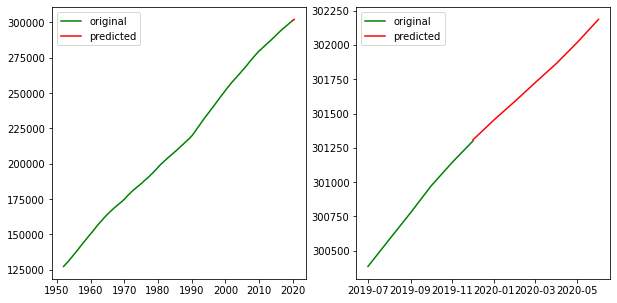

In [36]:
plt.figure(figsize = (10,5))
plt.subplot(121)
plt.plot(tsdata,label='original',c='g')
plt.plot(pred_6_mon_auto,label='predicted',c='r')
plt.legend()

plt.subplot(122)
plt.plot(tsdata[810:],label='original',c='g')
plt.plot(pred_6_mon_auto,label='predicted',c='r')
plt.legend()
plt.show()

We can see the predictions in the right hand graph which is the zoomed graph of left hand one.